# Introduction to Convulational Neural Networks

In [1]:
# Get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-17 02:01:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.126.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.9MB/s    in 3.2s    

2023-10-17 02:01:48 (32.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os
# Walk thru pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are len{ len(dirnames)} directories and {len(filenames)} imaes in /{dirpath}")

There are len2 directories and 0 imaes in /pizza_steak
There are len2 directories and 0 imaes in /pizza_steak/train
There are len0 directories and 750 imaes in /pizza_steak/train/steak
There are len0 directories and 750 imaes in /pizza_steak/train/pizza
There are len2 directories and 0 imaes in /pizza_steak/test
There are len0 directories and 250 imaes in /pizza_steak/test/steak
There are len0 directories and 250 imaes in /pizza_steak/test/pizza


In [6]:
num_steak_images = len(os.listdir("pizza_steak/train/steak"))
num_steak_images

750

To visualize our images, first let get the class names programmatically

In [7]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

pizza_steak/train


array(['pizza', 'steak'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # Set up the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image with matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (341, 512, 3)


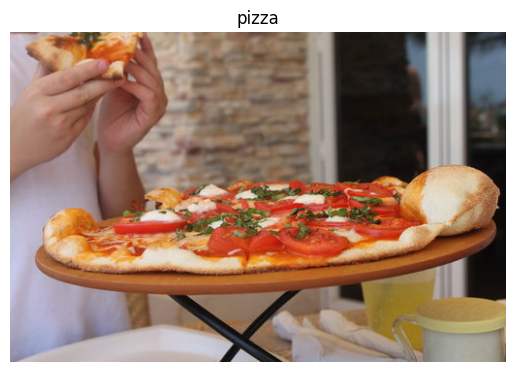

In [9]:
img = view_random_image("pizza_steak/train/", "pizza")


In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[165, 118, 102],
        [165, 118, 102],
        [164, 116, 102],
        ...,
        [ 44,  53,  62],
        [ 42,  51,  58],
        [ 41,  50,  57]],

       [[167, 125, 113],
        [166, 124, 112],
        [163, 120, 111],
        ...,
        [ 42,  49,  57],
        [ 40,  47,  53],
        [ 39,  46,  52]],

       [[180, 149, 146],
        [178, 147, 144],
        [173, 142, 140],
        ...,
        [ 39,  46,  54],
        [ 36,  43,  49],
        [ 34,  41,  47]],

       ...,

       [[144, 140, 167],
        [143, 139, 166],
        [141, 137, 164],
        ...,
        [119, 104,  85],
        [109,  94,  75],
        [ 96,  81,  62]],

       [[143, 137, 165],
        [142, 136, 164],
        [139, 133, 159],
        ...,
        [119, 104,  85],
        [108,  93,  74],
        [ 95,  80,  61]],

       [[139, 133, 161],
        [138, 132, 160],
        [136, 130, 156],
        ...,
        [119, 104,  8

In [11]:
# View image shape
img.shape # returns width, height, and color channels

(341, 512, 3)

In [12]:
# Get all pixel values between 0 and 1. However, we cannot do this for every image
img/255.

array([[[0.64705882, 0.4627451 , 0.4       ],
        [0.64705882, 0.4627451 , 0.4       ],
        [0.64313725, 0.45490196, 0.4       ],
        ...,
        [0.17254902, 0.20784314, 0.24313725],
        [0.16470588, 0.2       , 0.22745098],
        [0.16078431, 0.19607843, 0.22352941]],

       [[0.65490196, 0.49019608, 0.44313725],
        [0.65098039, 0.48627451, 0.43921569],
        [0.63921569, 0.47058824, 0.43529412],
        ...,
        [0.16470588, 0.19215686, 0.22352941],
        [0.15686275, 0.18431373, 0.20784314],
        [0.15294118, 0.18039216, 0.20392157]],

       [[0.70588235, 0.58431373, 0.57254902],
        [0.69803922, 0.57647059, 0.56470588],
        [0.67843137, 0.55686275, 0.54901961],
        ...,
        [0.15294118, 0.18039216, 0.21176471],
        [0.14117647, 0.16862745, 0.19215686],
        [0.13333333, 0.16078431, 0.18431373]],

       ...,

       [[0.56470588, 0.54901961, 0.65490196],
        [0.56078431, 0.54509804, 0.65098039],
        [0.55294118, 0

## An end to end example

Build a convolutional NN to find patterns in our images:
- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- COmpile our CNN
- Fit the CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values betweem 0 and 1)
train_datagen = ImageDataGenerator(
    rescale=1./255
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Setu paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Build CNN model (same as the tiny VGG)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile our CNN

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 219ms/step - loss: 0.6396 - accuracy: 0.6560 - val_loss: 0.4707 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4668 - accuracy: 0.7833 - val_loss: 0.4220 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4512 - accuracy: 0.8087 - val_loss: 0.4114 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 7s 152ms/step - loss: 0.3934 - accuracy: 0.8280 - val_loss: 0.3308 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3575 - accuracy: 0.8507 - val_loss: 0.3661 - val_accuracy: 0.8360


In [14]:
# Get a model summary()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 29160)             0

## using the same model as before

Lets use the previous model we build in previous section to see if it works

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 137ms/step - loss: 0.8208 - accuracy: 0.4920 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model_2 performs terribly, lets try to improving it

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 112ms/step - loss: 2.9756 - accuracy: 0.6193 - val_loss: 0.8592 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 1.1203 - accuracy: 0.6953 - val_loss: 0.4693 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.8272 - accuracy: 0.7327 - val_loss: 0.5073 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.8264 - accuracy: 0.7387 - val_loss: 0.4694 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5023 - accuracy: 0.7833 - val_loss: 0.5417 - val_accuracy: 0.7140


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary classification

1 . Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjsut different params and improve the model
7. Repeat until satisfied

# 1. Becone one with the data

Image shape: (289, 512, 3)
Image shape: (512, 512, 3)


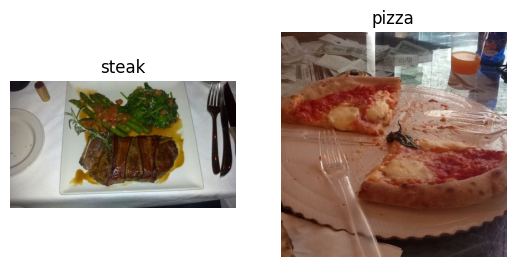

In [27]:
plt.figure()
plt.subplot(1, 2, 1 )
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2 )
steak_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Pre process the data

In [28]:
# Define a directory data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into batches

A batch is a small subset of data. Rather than look at all images at one time. a model migh only look at 32 at a time

It does it for:
- 11000 images or more migh not fit into memoy of your processor
- Try to learn the patterns could result in the model not being able to learn very well


In [29]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you are working with
                                               batch_size=32) # Size of a.k.a minibatches to load data into model

test_data =  test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
# Get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [37]:
# How many baches are there?
len(train_data)

47

In [36]:
1500/32

46.875

In [38]:
# Get the first two images

images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [40]:
images[7].shape

(224, 224, 3)

In [41]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

 A baseline is a realively simple model or existing result that you setup when beggining a machine learning exprimenting, you try to beat the baseline

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.random import set_seed

In [69]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [70]:
from keras.src.metrics.probabilistic_metrics import binary_crossentropy
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

 Fit the model

In [71]:

# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [72]:
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 162ms/step - loss: 0.6038 - accuracy: 0.6940 - val_loss: 0.4743 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3837 - accuracy: 0.8387 - val_loss: 0.3624 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 7s 153ms/step - loss: 0.2486 - accuracy: 0.9147 - val_loss: 0.3629 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.1383 - accuracy: 0.9633 - val_loss: 0.5200 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 7s 150ms/step - loss: 0.0501 - accuracy: 0.9900 - val_loss: 0.4710 - val_accuracy: 0.8020


In [57]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 98ms/step - loss: 0.3661 - accuracy: 0.8360


[0.36609044671058655, 0.8360000252723694]

### 5. Evaluate model

In [73]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 83ms/step - loss: 0.4710 - accuracy: 0.8020


[0.47104984521865845, 0.8019999861717224]

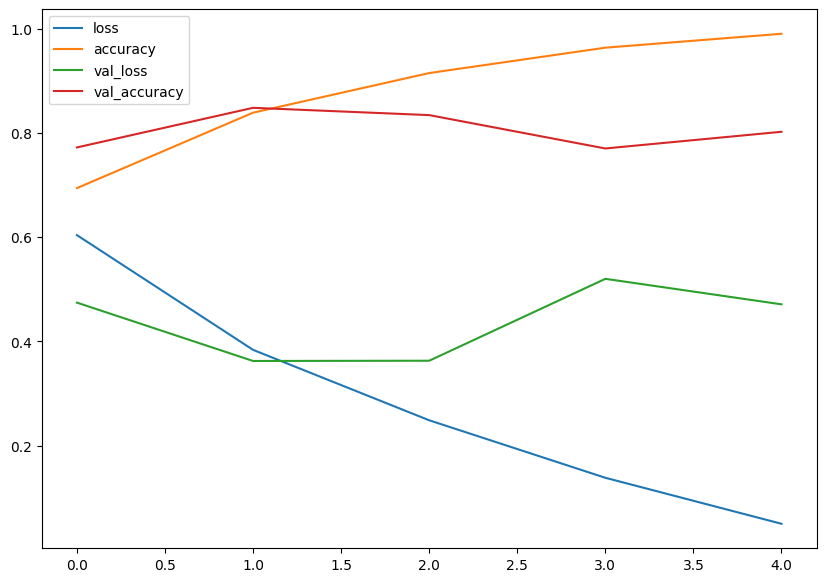

In [74]:

# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [75]:
# PLot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for validating and training metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure()
  plt.plot(epochs, acc, label="training_accuracy")
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


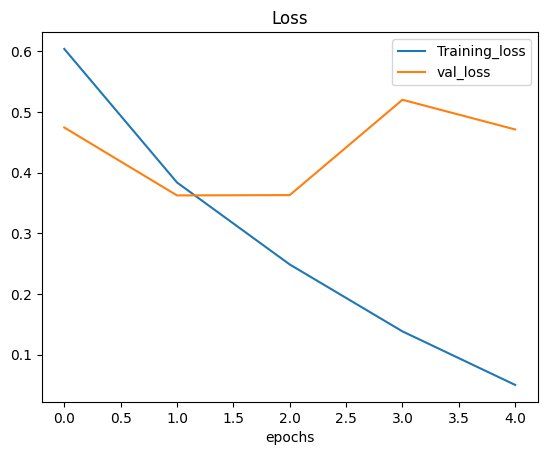

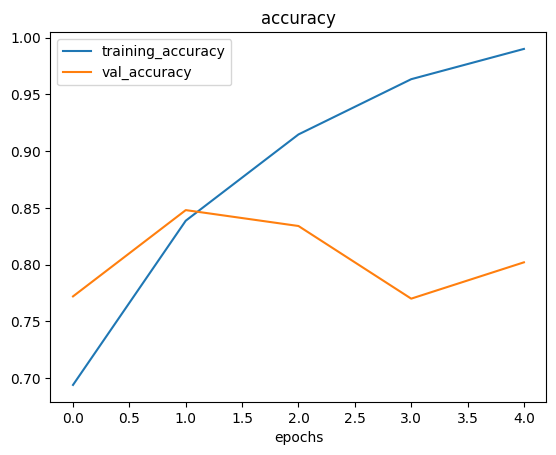

In [76]:
# CHeck out the loss and accuray model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

## 6. Adjust model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a basline.

1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.



In [85]:
# Create the model (this is going to be the new baseline)

model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
   Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
  Flatten(),
    Dense(1, activation="sigmoid")

])

In [86]:
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

In [87]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 119ms/step - loss: 0.5936 - accuracy: 0.6967 - val_loss: 0.4744 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4600 - accuracy: 0.7953 - val_loss: 0.4047 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4123 - accuracy: 0.8193 - val_loss: 0.4299 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4056 - accuracy: 0.8227 - val_loss: 0.3371 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3664 - accuracy: 0.8487 - val_loss: 0.3054 - val_accuracy: 0.8820


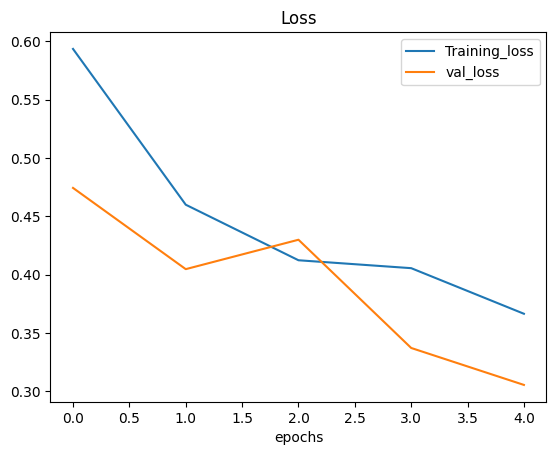

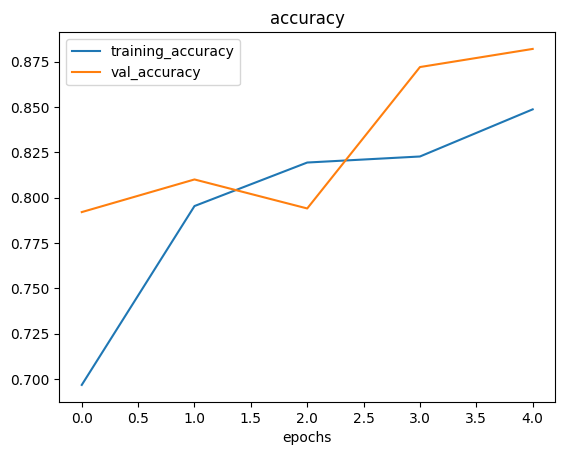

In [88]:
# CHeck out the loss and accuray model_5
plot_loss_curves(history_5)

In [89]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 10)       